In [1]:
accuracy = {
    "512": 1.0,
    "256": 0.999,
    "128": 0.999,
    "64": 0.999,
    "32": 0.999,
    "16": 0.998,
    "8": 0.975,
    "4": 0.790,
    "2": 0.608,
    "1": 0.355,
}


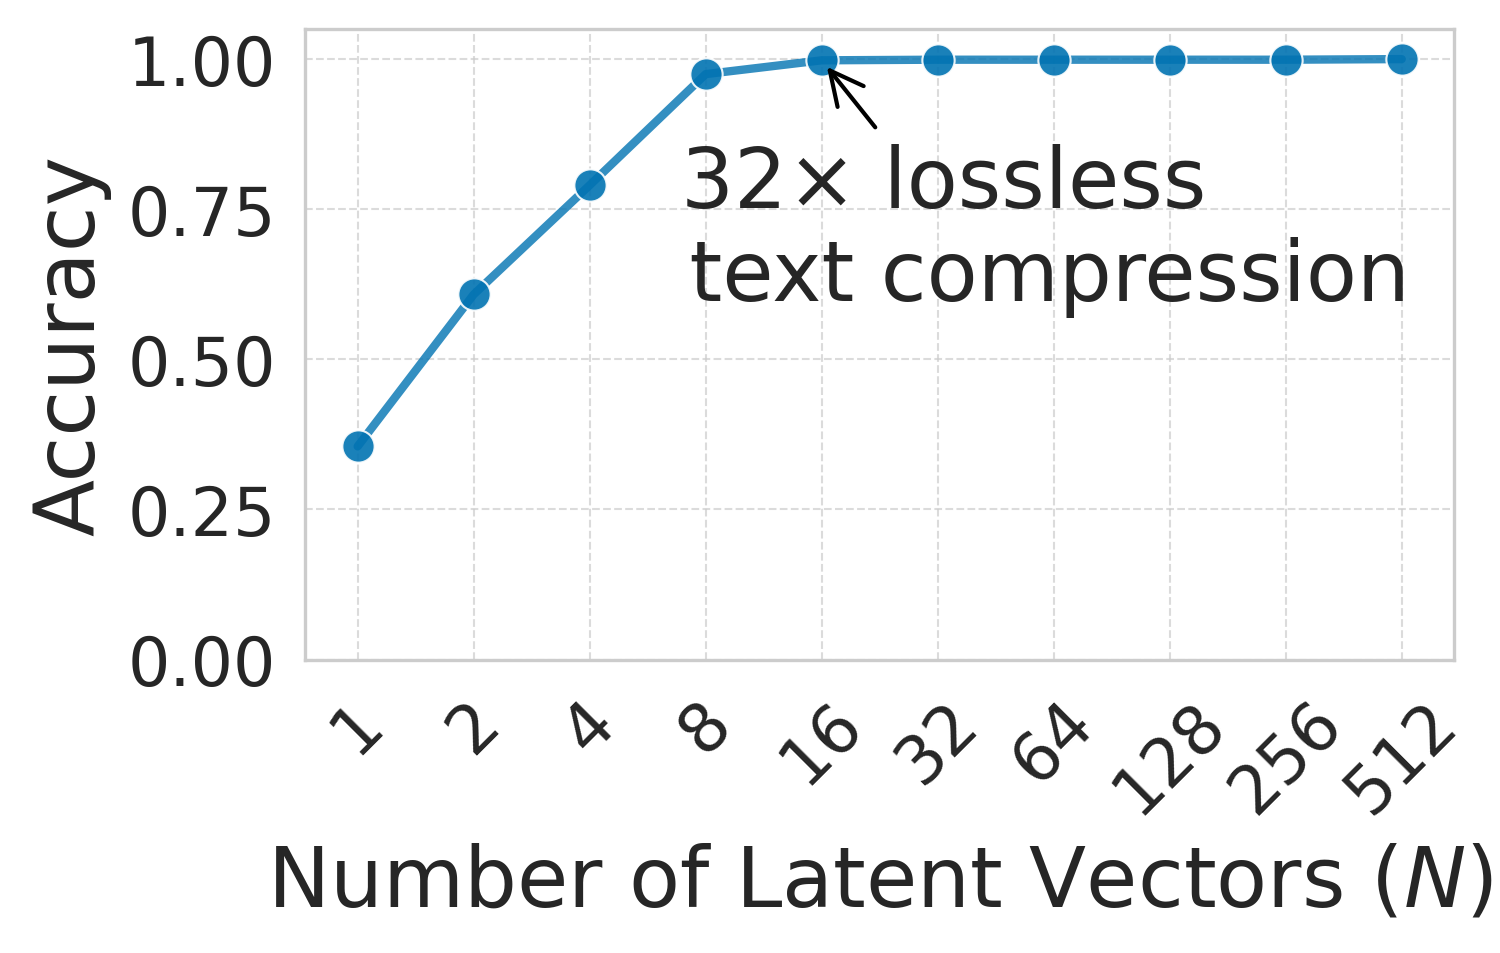

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Set the style for the plot - using updated style name
sns.set_style("whitegrid")  # Using seaborn's set_style instead of plt.style.use
mpl.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'axes.linewidth': 0.8,
    'grid.linewidth': 0.5,
    'lines.linewidth': 2.5,
    'figure.dpi': 300,
})

# Create the figure with appropriate dimensions for ICML
fig, ax = plt.subplots(figsize=(5.5, 4), dpi=300)

# Prepare the data
dimensions = np.array([int(k) for k in accuracy.keys()])
accuracy_values = np.array(list(accuracy.values()))

# Sort the data by dimensions
idx = np.argsort(dimensions)
dimensions = dimensions[idx]
accuracy_values = accuracy_values[idx]

# Plot the data points and line (no smoothing)
main_color = '#0173b2'  # A nice blue color
ax.scatter(dimensions, accuracy_values, s=60, color=main_color, 
           alpha=0.9, edgecolor='white', linewidth=0.5, zorder=3)
ax.plot(dimensions, accuracy_values, color=main_color, alpha=0.8, linewidth=2, zorder=2)

# Set x-axis to log scale
ax.set_xscale('log', base=2)
ax.set_xticks(dimensions)
ax.set_yticks([0., 0.25, 0.5, 0.75, 1.0])
ax.set_xticklabels([str(d) for d in dimensions], rotation=45)
ax.tick_params(axis='x', which='minor', bottom=False)

# Set y-axis limits from 0 to 1
ax.set_ylim(0, 1.05)

# Add labels (no title)
ax.set_xlabel('Number of Latent Vectors ($N$)')
ax.set_ylabel('Accuracy')

# Add grid for better readability
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)

# Add annotation at x=32
x = 16
idx_32 = np.where(dimensions == 16)[0][0]
ax.annotate(f'{512 // x}× lossless \n       text compression',
            xy=(x, accuracy_values[idx_32]),
            xytext=(x + 20, accuracy_values[idx_32] - 0.4),
            arrowprops=dict(arrowstyle='->', color='black', linewidth=1),
            fontsize=20, ha='center')

# Adjust layout
plt.tight_layout()

# Save the figure in high resolution for publication
width_px, height_px = 3200, 2000
save_dpi = 600
plt.gcf().set_size_inches(width_px / save_dpi, height_px / save_dpi)

plt.savefig('model_accuracy_vs_dimension.pdf', format='pdf', dpi=600, bbox_inches='tight')

# Display the plot
plt.show()